In [3]:
#Importing the necessary libraries
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
import numpy_financial as npf

In [4]:
#Getting the data and puting it in object 'electricity_consumption_data'
electricity_consumption_data = pd.read_excel(r"Junior_data_Analyst_Data.xlsx",parse_dates = ["Date_hour_start"],skiprows=2,nrows=8760)
electricity_consumption_data = electricity_consumption_data.copy()
electricity_consumption_data

,Hour,Date_hour_start,Solar_electricity_generation_kWh,Electricity_usage_kWh
0,0,2020-01-01 00:00:00,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000
...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600
8756,20,2020-12-31 20:00:00,0.003,4.560600
8757,21,2020-12-31 21:00:00,0.000,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000


In [5]:
# Unifying all the naming conventions to lower characters to ensure code consistency and maintainability:
electricity_consumption_data.columns = electricity_consumption_data.columns.str.lower()
electricity_consumption_data.columns

Index(['hour', 'date_hour_start', 'solar_electricity_generation_kwh',
       'electricity_usage_kwh'],
      dtype='object')

## Checking if the data is data is complete and fit for use

In [6]:
#Checking the statistical measures 
electricity_consumption_data.describe() 

,hour,date_hour_start,solar_electricity_generation_kwh,electricity_usage_kwh
count,8760.000000,8760,8760.000000,8760.000000
mean,11.500000,2020-07-02 07:37:13.972602624,1.116750,7.312704
min,0.000000,2020-01-01 00:00:00,0.000000,-12.624000
25%,5.750000,2020-04-02 05:45:00,0.000000,0.300000
50%,11.500000,2020-07-02 11:30:00,0.024000,0.621000
75%,17.250000,2020-10-01 17:15:00,1.272750,1.686000
max,23.000000,2020-12-31 23:00:00,13.050000,46000.000000
std,6.922582,NaN,2.026098,491.479806


* *Clearly the electricity_usage_kwh column has negative electricity which does not really make sense, so we have to drop this values*

In [7]:
# Checking information in the data                                                       
electricity_consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   hour                              8760 non-null   int64         
 1   date_hour_start                   8760 non-null   datetime64[ns]
 2   solar_electricity_generation_kwh  8760 non-null   float64       
 3   electricity_usage_kwh             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [8]:
#Checking for Missing values in the data
electricity_consumption_data.isnull().sum()

hour                                0
date_hour_start                     0
solar_electricity_generation_kwh    0
electricity_usage_kwh               0
dtype: int64

In [9]:
#Dropping electricity_usage_kwh rows which have values < 0
electricity_consumption_data = electricity_consumption_data[electricity_consumption_data['electricity_usage_kwh'] >= 0]
electricity_consumption_data.shape

(8755, 4)

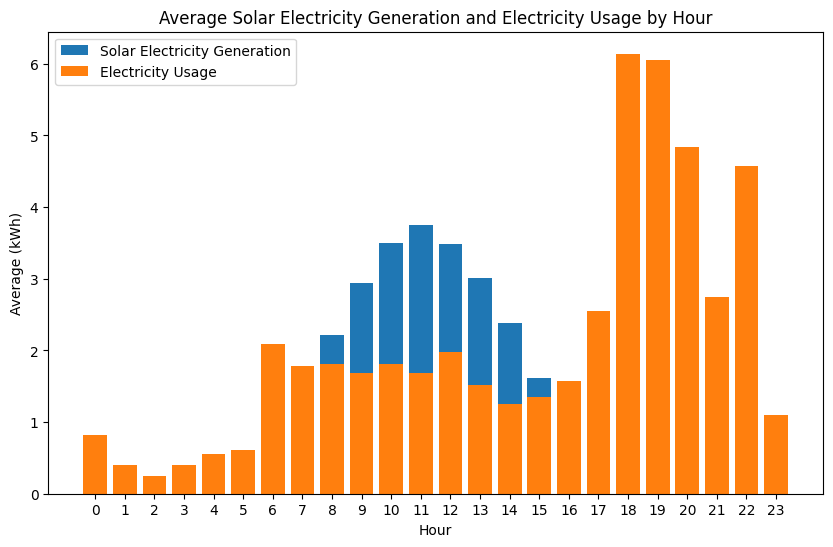

In [26]:
# Creating a Graph showing the average solar electricity generation and average electricity usage for each hour in a day
aggregated_data = electricity_consumption_data.groupby('hour')[['solar_electricity_generation_kwh','electricity_usage_kwh']].agg([np.mean]).reset_index()

# Setting the figure size
plt.figure(figsize=(10, 6))

# Plotting the bar graph
plt.bar(aggregated_data['hour'], aggregated_data[('solar_electricity_generation_kwh', 'mean')], label='Solar Electricity Generation')
plt.bar(aggregated_data['hour'], aggregated_data[('electricity_usage_kwh', 'mean')], label='Electricity Usage')

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Average (kWh)')
plt.title('Average Solar Electricity Generation and Electricity Usage by Hour')
plt.legend()
plt.xticks(aggregated_data['hour'])
plt.show()


* *The hourly electricity usage is significantly higher than the Solar electricity Generated*

### Checking for outliers/Investigating extreme values

Text(0.5, 1.0, 'Boxenplot of Electricity Usage')

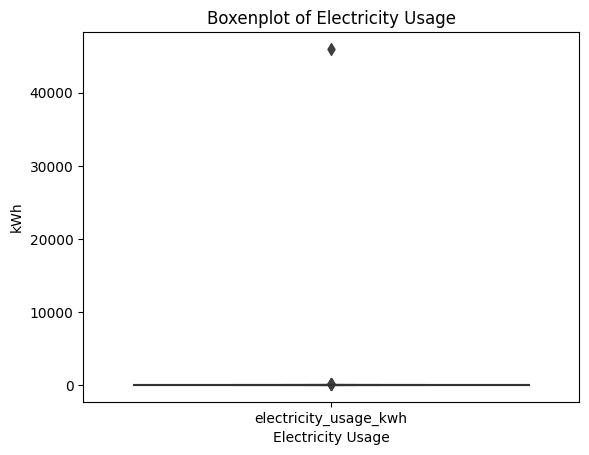

In [11]:
# Creating a boxenplot for 'electricity_usage_kwh' column
sns.boxenplot(data=electricity_consumption_data[['electricity_usage_kwh']])

# Adding labels and title
plt.xlabel('Electricity Usage')
plt.ylabel('kWh')
plt.title('Boxenplot of Electricity Usage')

* *Most of the data is concentrated under the 65 value. It is clear that in the above boxplot that the value above 65 is an outlier*

In [12]:
#Checking the Z-score to make the necessary corrections to the data
upper_limit = electricity_consumption_data['electricity_usage_kwh'].mean() + 0.125*electricity_consumption_data['electricity_usage_kwh'].std()
lower_limit = electricity_consumption_data['electricity_usage_kwh'].mean() - 0.01488925*electricity_consumption_data['electricity_usage_kwh'].std()
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 68.77161105378542
lower limit: -0.0007504693841644539


In [13]:
#Using the Z-score to remove outliers to trim the data
new_electricity_consumption_data = electricity_consumption_data.loc[(electricity_consumption_data['electricity_usage_kwh'] < upper_limit) & (electricity_consumption_data['electricity_usage_kwh'] > lower_limit)]
electricity_consumption_data = new_electricity_consumption_data
print('Before removing outliers:',len(electricity_consumption_data))
print('After removing outliers:',len(new_electricity_consumption_data))
print('Outliers:',len(electricity_consumption_data)-len(new_electricity_consumption_data))

Before removing outliers: 8754
After removing outliers: 8754
Outliers: 0


Text(0.5, 1.0, 'Boxenplot of Electricity Usage')

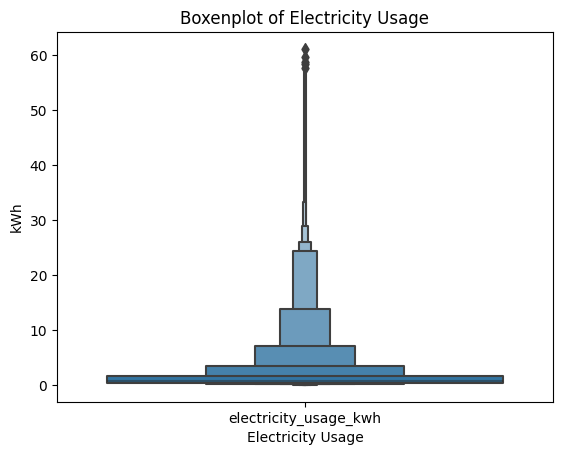

In [14]:
#Checking if the outliers were removed as expected

# Creating a boxenplot for 'electricity_usage_kwh' column
sns.boxenplot(data=electricity_consumption_data[['electricity_usage_kwh']])

# Adding labels and title
plt.xlabel('Electricity Usage')
plt.ylabel('kWh')
plt.title('Boxenplot of Electricity Usage')

* *The above boxenplot shows that the extreme values (outliers) were removed as expected, this explains the reason of a better display of the distribution of data*

### Electricity to be bought for each hour from the electricity provider for each hour in 2020

In [15]:
#Electricity will be bought when there is a net negative in the generation.
# We will therefor need to create a new feature (net_electricity) that finds the difference between generated electricity and electricity usage
electricity_consumption_data['net_electricity'] = electricity_consumption_data['solar_electricity_generation_kwh'] - electricity_consumption_data['electricity_usage_kwh'] #creating a bespoke feature from the data we already have
aggregated_data = electricity_consumption_data.groupby('date_hour_start')['net_electricity'].sum().reset_index()
filtered_data = aggregated_data[aggregated_data['net_electricity'] < 0] 
filtered_data['net_electricity'] = filtered_data['net_electricity'].abs()
filtered_data

C:\Users\Ernest\AppData\Local\Temp\ipykernel_17260\3356079481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['net_electricity'] = filtered_data['net_electricity'].abs()


,date_hour_start,net_electricity
0,2020-01-01 00:00:00,1.509849
1,2020-01-01 01:00:00,1.411859
2,2020-01-01 02:00:00,1.023898
3,2020-01-01 03:00:00,0.642000
4,2020-01-01 04:00:00,0.960000
...,...,...
8749,2020-12-31 19:00:00,4.383600
8750,2020-12-31 20:00:00,4.557600
8751,2020-12-31 21:00:00,2.022000
8752,2020-12-31 22:00:00,1.653000


### Calculating the Excess solar Electricity generated

In [16]:
#Since we already have the net electricity feature, to get the excess electricity we will have to take the net positive from net electricity feature
excess_electricity = electricity_consumption_data[electricity_consumption_data["net_electricity"] > 0]
excess_electricity = excess_electricity[['date_hour_start','net_electricity']] # Showing only the required columns 'date_hour_start'(each hour)'net_electricity'
excess_electricity

,date_hour_start,net_electricity
9,2020-01-01 09:00:00,0.240
12,2020-01-01 12:00:00,0.255
58,2020-01-03 10:00:00,0.189
59,2020-01-03 11:00:00,0.267
60,2020-01-03 12:00:00,1.671
...,...,...
8723,2020-12-30 11:00:00,0.123
8724,2020-12-30 12:00:00,2.649
8725,2020-12-30 13:00:00,0.129
8749,2020-12-31 13:00:00,2.064


### Model the cumulative battery charge level for each hour over 2020, assuming a battery had already been installed.

In [17]:
#To get the cummulative battery charge we would need to sum up all the values in the net_electricity feature
#The assumption is that the battery stores limitless electricity
# Zero kWh at the begining of Jan
# Max charge level + net for each hour
cummulative_charge = electricity_consumption_data['net_electricity'].sum() + 0 
print('The cummulative charge is:', abs(cummulative_charge))

The cummulative charge is: 8303.1522628


### Calculating the amount of electricity for each hour in 2020 that would have been bought from the electricity provider assuming a battery had already been installed.

In [18]:
#This is similar to the time when there is a net_electricity is negative and adding the stored power in the battery
electricity_consumption_data["net_electricity"] = electricity_consumption_data['solar_electricity_generation_kwh'] - electricity_consumption_data['electricity_usage_kwh']
negative_data = electricity_consumption_data["net_electricity"]
negative_values = electricity_consumption_data[electricity_consumption_data["net_electricity"] < 0]

#We would need to sum the net negative electricity values to know the time when the solar electricity was supplemented by buying
bought_electricity = negative_values['net_electricity'].sum()
#We need to know the amount of net positive electricity that was stored
print('The amount of electricity that would have been bought is:', abs(bought_electricity))

The amount of electricity that would have been bought is: 15625.2482944


* *The amount of electricity that would have been bought is 15625.2482944 kWh*

### Savings Over 2020 from installing a battery compared to using the existing solar panels alone

In [19]:
# This section calculates and displays the electricity savings achieved over the year 2020 by comparing the purchased electricity with the stored electricity from a battery system. The calculations consider
# both the amount of electricity bought and the excess electricity stored

# These calculations provide insights into the amount of electricity saved 

print('Bought electricity:' , abs(bought_electricity))
print('Stored electricity:', sum(excess_electricity['net_electricity']))
saved_electricity = abs(bought_electricity) - sum(excess_electricity['net_electricity'])
savings = saved_electricity * 0.17
print('Savings Over 2020',savings)

Bought electricity: 15625.2482944
Stored electricity: 7322.096031600002
Savings Over 2020 1411.5358846759998


* *The savings over 2020 is $1411.54*

## Charts Illustrating Further Information on The Data

### Monthly Solar Generation


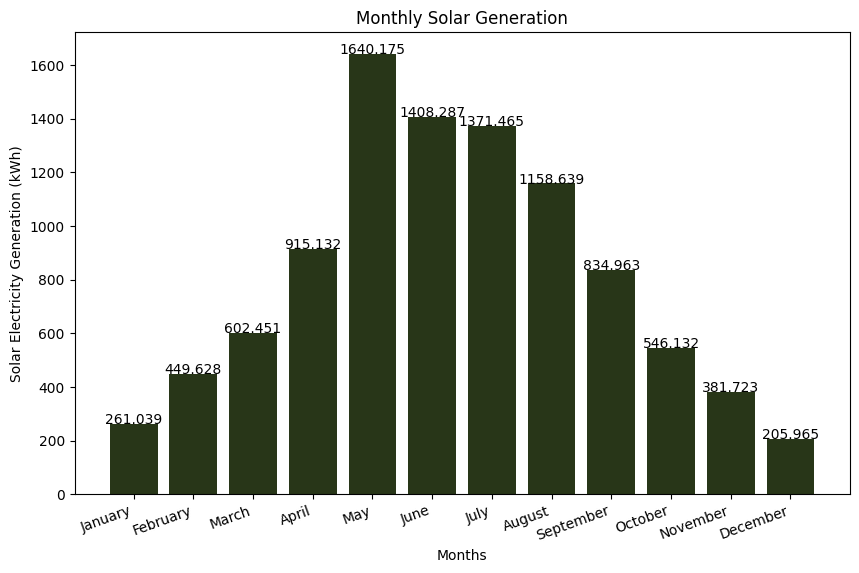

In [20]:
# We will first build a bar graph for monthly solar generation by grouping the data by month with regards to solar electricity generation and aggregating by sum.

# Extracting months from the datetime column
electricity_consumption_data['month'] = electricity_consumption_data['date_hour_start'].dt.month

#Grouping by months to get monthly solar generation and aggregating by solar_electricity_generation_kwh
monthly_solar_generation = electricity_consumption_data.groupby('month')['solar_electricity_generation_kwh'].sum().reset_index()

# Setting the figure size
plt.figure(figsize=(10, 6))

#Ploting a bar graph to show this
values = monthly_solar_generation['solar_electricity_generation_kwh']
labels = [ 'January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

plt.title("Monthly Solar Generation")
plt.xlabel("Months")
plt.ylabel("Solar Electricity Generation (kWh)")
plt.bar(labels,values,color=('#283618'))
plt.xticks(rotation = 20, ha='right')

for i, v in enumerate(values):
    plt.text(i,v,str(v),ha='center')

### Monthly Solar Usage

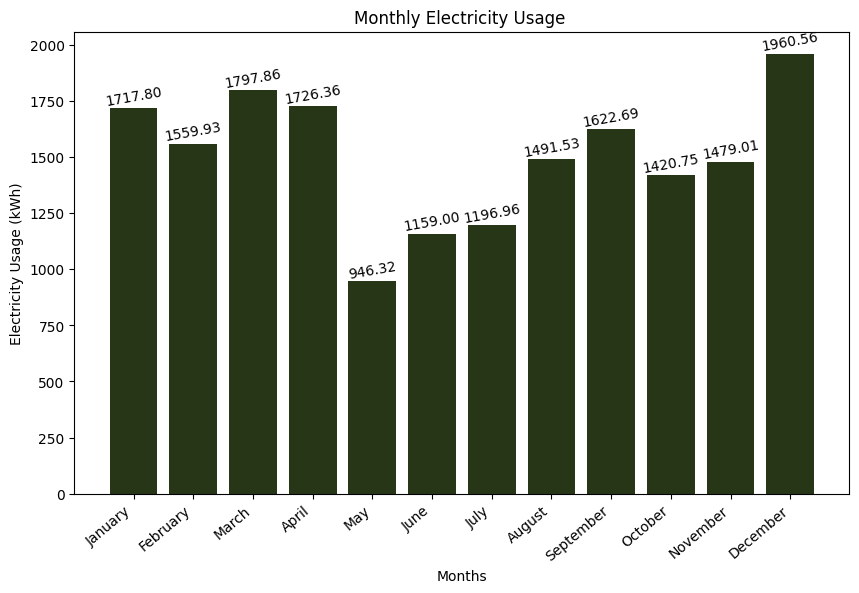

In [21]:
# The second bar graph is monthly solar usage is achieved by grouping the data by month with regards to solar electricity usage and aggregating by sum

#Grouping by months to get monthly electricity usage and aggregating by electricity_usage_kwh
monthly_electicity_usage = electricity_consumption_data.groupby('month')['electricity_usage_kwh'].sum().reset_index()

# Setting the figure size
plt.figure(figsize=(10, 6))


#Ploting a bar graph to show this
values = monthly_electicity_usage['electricity_usage_kwh']
labels = [ 'January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

plt.title("Monthly Electricity Usage ")
plt.xlabel("Months")
plt.ylabel("Electricity Usage (kWh)")
plt.bar(labels,values,color=('#283618'))
plt.xticks(rotation = 40, ha='right')

for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}", ha='center', rotation=10, va='bottom')
   

In [22]:
electricity_consumption_data

,hour,date_hour_start,solar_electricity_generation_kwh,electricity_usage_kwh,net_electricity,month
0,0,2020-01-01 00:00:00,0.000,1.509849,-1.509849,1
1,1,2020-01-01 01:00:00,0.000,1.411859,-1.411859,1
2,2,2020-01-01 02:00:00,0.000,1.023898,-1.023898,1
3,3,2020-01-01 03:00:00,0.000,0.642000,-0.642000,1
4,4,2020-01-01 04:00:00,0.000,0.960000,-0.960000,1
...,...,...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600,-4.383600,12
8756,20,2020-12-31 20:00:00,0.003,4.560600,-4.557600,12
8757,21,2020-12-31 21:00:00,0.000,2.022000,-2.022000,12
8758,22,2020-12-31 22:00:00,0.015,1.668000,-1.653000,12


### Monthly electricity purchased from the electricity provider (No battery)


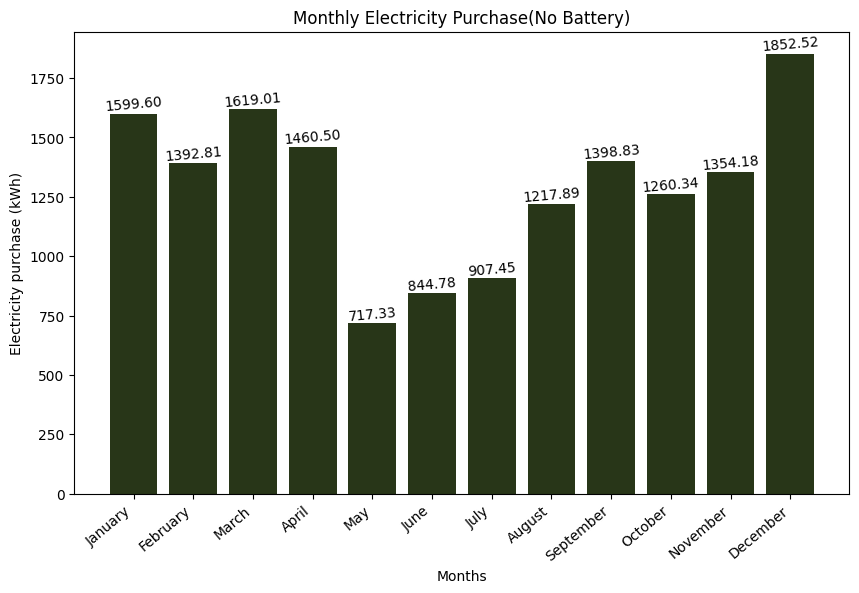

In [34]:
#For the Purchase Electricity to be a necessity when there is No Battery, net_electricity produced needs to be negative, we will therefore take the absolute net negative values from the net_electricity feature 

# To solve this problem we will need to recall that the reason electricity was Purchased was when the net_electricity was negative (More electricity Used than the one produced)
purchase_of_electricity = electricity_consumption_data[electricity_consumption_data["net_electricity"] < 0]
purchase_of_electricity

# Grouping by months to get monthly electricity usage and aggregating by net_electricity
monthly_electricity_purchase = purchase_of_electricity.groupby('month')['net_electricity'].sum().reset_index()

# Setting the figure size
plt.figure(figsize=(10, 6))

# Ploting a bar graph to showing monthly_electricity_usage and taking the absolute 
values = monthly_electricity_purchase['net_electricity'].abs()
labels = [ 'January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

plt.title("Monthly Electricity Purchase(No Battery)")
plt.xlabel("Months")
plt.ylabel("Electricity purchase (kWh)")
plt.bar(labels,values,color=('#283618'))
plt.xticks(rotation = 40, ha='right')

for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}", ha='center', rotation=5, va='bottom')
   

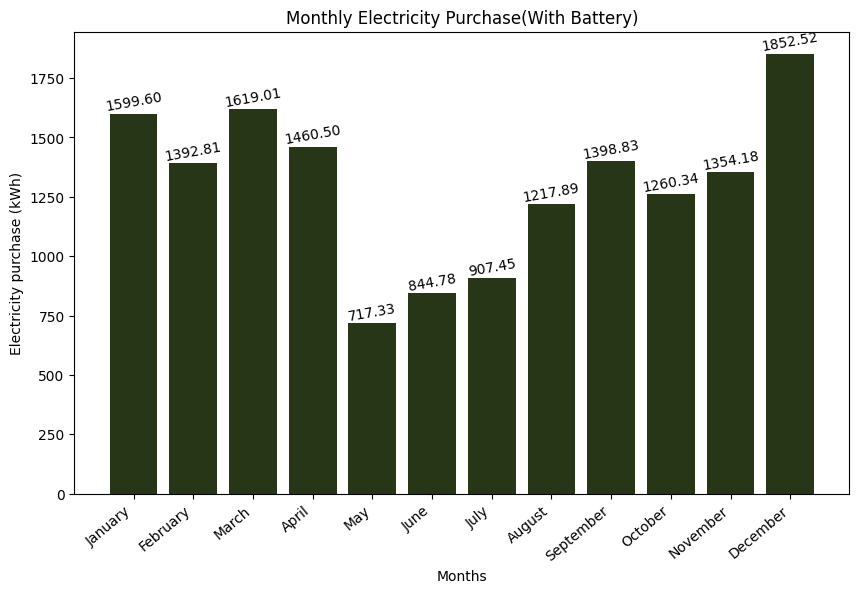

In [35]:
#For the Purchase Electricity to be a necessity when there is a Battery, net_electricity produced needs to be negative, we will therefore take the absolute net negative values from the net_electricity feature 
#There is no inherent difference between the presence or absence of a battery - the net negative electricity will not be affected with presence or absence of a battery

#Grouping by months to get monthly electricity usage and aggregating by electricity_usage_kwh
monthly_electricity_purchase_b = electricity_consumption_data.groupby('month')['net_electricity'].sum().reset_index()

#Purchase of electricity happened when the net electricity was negative
purchase_of_electricity_b = electricity_consumption_data[electricity_consumption_data["net_electricity"] < 0]

#Grouping by months to get monthly electricity usage and aggregating by net_electricity
monthly_electricity_purchase_b = purchase_of_electricity_b.groupby('month')['net_electricity'].sum().reset_index()


# Setting the figure size
plt.figure(figsize=(10, 6))


#Ploting a bar graph to showing monthly_electricity_usage
values = monthly_electricity_purchase_b['net_electricity'].abs()
labels = [ 'January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

plt.title("Monthly Electricity Purchase(With Battery)")
plt.xlabel("Months")
plt.ylabel("Electricity purchase (kWh)")
plt.bar(labels,values,color=('#283618'))
plt.xticks(rotation = 40, ha='right')

for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}", ha='center', rotation=10, va='bottom')
   

### Twenty Year Projection

In [63]:
num_years = 20  # number of years to projected

# Calculating future years from 2022
future_years = np.arange(2022, 2022 + num_years)

# Initializing arrays to store annual savings and NPV for each scenario
annual_savings_scenario1 = []
annual_savings_scenario2 = []
npv_scenario1_list = []
npv_scenario2_list = []

# Looping through each future year
for year in future_years:
    # Calculating electricity price increase for Scenario 2
    electricity_price_increase_scenario1 =  (0.04 * (year - 2022))
    # Calculating electricity price increase for Scenario 2
    electricity_price_increase_scenario2 = 0.04 + (0.0025 * (year - 2022))
    
    # Calculating NPV for Scenario 1 for the given year
    npv_scenario1_year = np.sum(
        (
            (agg_data['solar_electricity_generation_kwh'] - agg_data['stored_electricity']) *
            electricity_price_increase_scenario1
        ) / (1 + discount_rate) ** (agg_data['hourly'] / 24)
        - battery_cost
    )
    npv_scenario1_list.append(npv_scenario1_year)
    
    # Calculating NPV for Scenario 2 for the given year
    npv_scenario2_year = np.sum(
        (
            (agg_data['solar_electricity_generation_kwh'] - agg_data['stored_electricity']) *
            electricity_price_increase_scenario2
        ) / (1 + discount_rate) ** (agg_data['hourly'] / 24)
        - battery_cost
    )
    npv_scenario2_list.append(npv_scenario2_year)
    
    # Calculating annual savings for both scenarios for the given year
    annual_savings_scenario1_year = np.sum(
        (
            agg_data['solar_electricity_generation_kwh'] - agg_data['stored_electricity']
        ) * electricity_price_increase_scenario1
    )
    annual_savings_scenario2_year = np.sum(
        (
            agg_data['solar_electricity_generation_kwh'] - agg_data['stored_electricity']
        ) * electricity_price_increase_scenario2
    )
    
    annual_savings_scenario1.append(annual_savings_scenario1_year)
    annual_savings_scenario2.append(annual_savings_scenario2_year)

# Calculating NPV for both scenarios over the 20-year projection
npv_scenario1_total = abs(np.sum(npv_scenario1_list) / (1 + discount_rate) * electricity_price_increase_scenario1)
npv_scenario2_total = abs(np.sum(npv_scenario2_list) / (1 + discount_rate) * electricity_price_increase_scenario2)

print("Annual Savings Scenario 1:", annual_savings_scenario1)
print("Annual Savings Scenario 2:", annual_savings_scenario2)
print("NPV Scenario 1:", npv_scenario1_total)
print("NPV Scenario 2:", npv_scenario2_total)

Annual Savings Scenario 1: [0.0, 0.67916048, 1.35832096, 2.0374814399999996, 2.71664192, 3.3958024, 4.074962879999999, 4.75412336, 5.43328384, 6.11244432, 6.7916048, 7.47076528, 8.149925759999999, 8.829086239999999, 9.50824672, 10.187407199999999, 10.86656768, 11.54572816, 12.22488864, 12.90404912]
Annual Savings Scenario 2: [0.67916048, 0.72160801, 0.76405554, 0.80650307, 0.8489506, 0.89139813, 0.93384566, 0.97629319, 1.0187407199999998, 1.06118825, 1.1036357799999998, 1.14608331, 1.18853084, 1.2309783700000003, 1.2734259, 1.3158734300000001, 1.35832096, 1.4007684900000001, 1.44321602, 1.48566355]
NPV Scenario 1: 2408966.5173727307
NPV Scenario 2: 277356.75056186604


### Analysis for Naomi

In [57]:
# Hourly data for 2020 (from aggregated_data)
data = {
    'hourly': list(range(24)),
    'solar_electricity_generation_kwh': [
        0.000000, 0.035753, 0.000000, 0.000000, 0.078559, 0.270625, 0.722868, 1.394885,
        2.210135, 2.941512, 3.504041, 3.751915, 3.491159, 3.012649, 2.380767, 1.609068,
        0.790964, 0.365388, 0.160652, 0.047186, 0.012912, 0.008942, 0.010126, 0.000000
    ],
    'electricity_usage_kwh': [
        0.816471, 0.401552, 0.250623, 0.407688, 0.552038, 0.610852, 2.084071, 1.788123,
        1.809272, 1.681553, 1.807175, 1.685425, 1.978467, 1.512797, 1.249093, 1.356370,
        1.566312, 2.550950, 6.140079, 6.055943, 4.843858, 2.746294, 4.569542, 1.101171
    ]
}


# Creating a DataFrame from the data
agg_data = pd.DataFrame(data)
#What we know already
battery_cost = 7000
discount_rate = 0.06  # 6%

# Electricity price
electricity_price = 0.17

# Calculating extra electricity from solar panel and battery combination
agg_data['excess_electricity'] = agg_data['solar_electricity_generation_kwh'] - agg_data['electricity_usage_kwh']
agg_data['stored_electricity'] = agg_data['excess_electricity'].clip(lower=0, upper=12.5)

# Calculating dollar savings from installing the battery
agg_data['dollar_savings'] = agg_data['stored_electricity'] * electricity_price

# Calculating NPV for both scenarios
electricity_price_increase_scenario1 = 0.04
electricity_price_increase_scenario2 = 0.0425  # 4.0% + 0.25% increase per year

agg_data['npv_scenario1'] = (
    (agg_data['solar_electricity_generation_kwh'] - agg_data['stored_electricity']) * electricity_price_increase_scenario1
) / (1 + discount_rate) ** (agg_data['hourly'] / 24) 

agg_data['npv_scenario2'] = (
    (agg_data['solar_electricity_generation_kwh'] - agg_data['stored_electricity']) * electricity_price_increase_scenario2
) / (1 + discount_rate) ** (agg_data['hourly'] / 24)

# Calculating IRR for both scenarios
irr_scenario1 = npf.irr(agg_data['npv_scenario1'])
irr_scenario2 = npf.irr(agg_data['npv_scenario2'])

# Calculating NPV for both scenarios
Scenario_1_NPV = agg_data['npv_scenario1'].sum()*battery_cost
Scenario_2_NPV = agg_data['npv_scenario2'].sum()*battery_cost

print("Scenario 1 NPV is : $",Scenario_1_NPV)
print("Scenario 2 NPV is : $",Scenario_2_NPV)
print("IRR Scenario 1:", irr_scenario1)
print("IRR Scenario 2:", irr_scenario2)


Scenario 1 NPV is : $ 4629.093451080467
Scenario 2 NPV is : $ 4918.4117917729955
IRR Scenario 1: nan
IRR Scenario 2: nan


In [41]:
#Exporting the cleaned data for further analysis In Bi Tools(Power Bi/Tableau)
electricity_consumption_data[['hour', 'date_hour_start', 'solar_electricity_generation_kwh','electricity_usage_kwh', 'net_electricity', 'month']].to_csv("cleaned_electricity_consumption_data.csv")